# Ship Crew Size Prediction 

### Import Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from pprint import pprint

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="ticks", color_codes=True)

### Load Data

In [2]:
df=pd.read_csv("cruise_ship_info.csv")

In [3]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
print ('Data has ' + str(df.shape[0]) + ' ships & ' + str(df.shape[1]) + ' features.')

Data has 158 ships & 9 features.


### Exploratory Data Analysis (EDA)

In [5]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [6]:
# Check for nulls and types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [7]:
# Check for duplicates

df.duplicated().sum()

0

No missing data/Nulls or duplicates. The dataset contains two categorical features/columns which are Ship name and Company. The remaining columns are numerical.

In [8]:
# statistics for the numerical columns

df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


The min, max and quarantiles which indicates a fairly distrubuted data points. No need for scaling or standardization. Normalization is useful when your data has varying scales and planning to use sensitive models to they variations.

The count is the total number rows in our dataset which is 158,

The mean measures the average of all columns for example the minimum number of passengers in any ship is 18 and the maximum number is 54

The Standard deviation is 7.615691 which shows how spread the dataset.

25%, 50%, and 75% shows the IQR which from the above show that our dataset is normally distributed meaning the values is not far away from the middle.

min tell us the minimum value in each column

max show the maximum value of each column

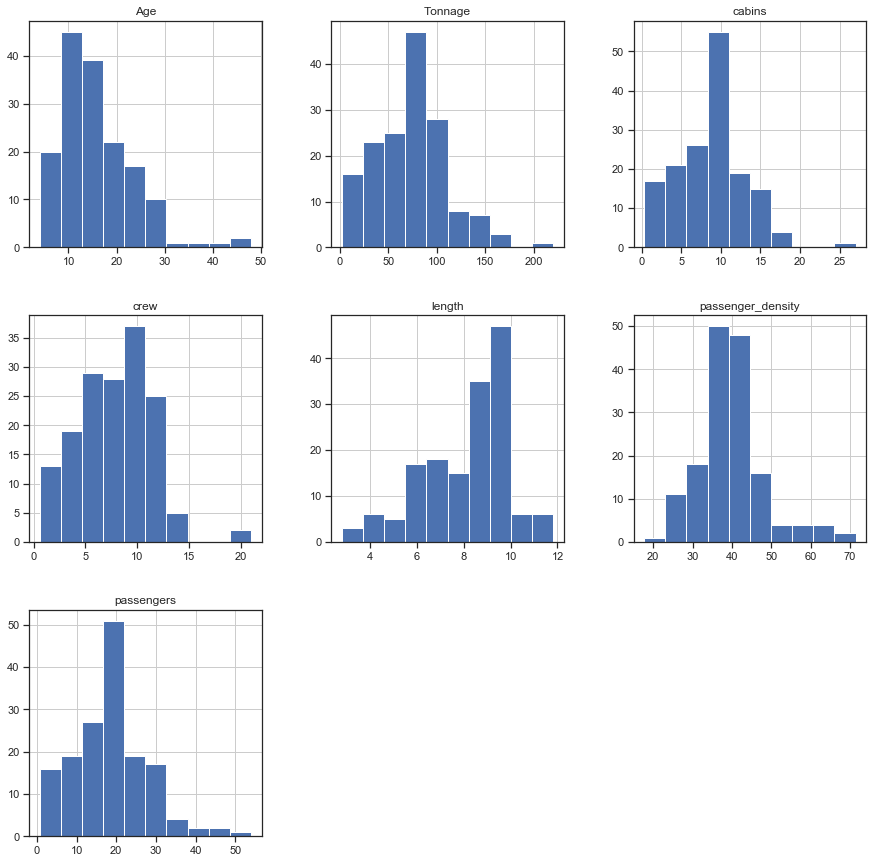

In [9]:
df.hist(figsize=(15,15))
plt.show()

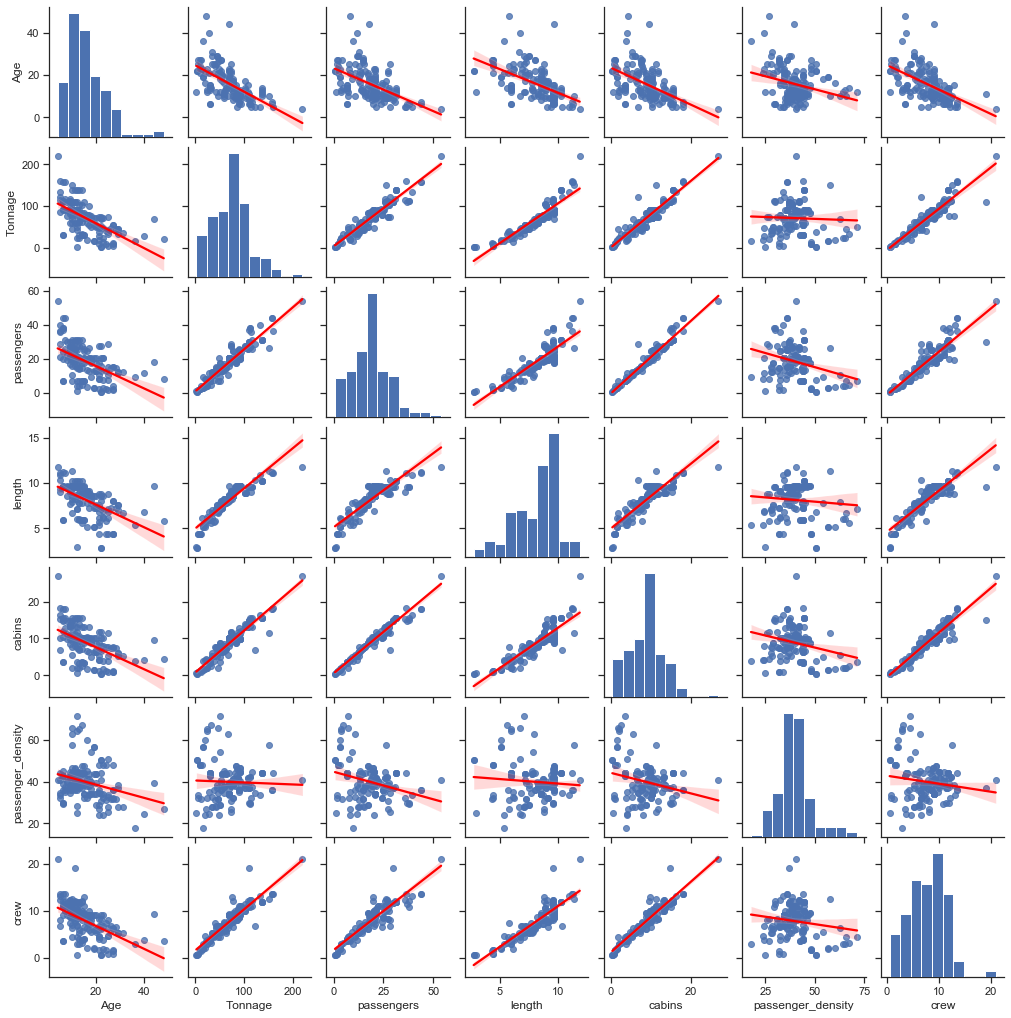

In [10]:
sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}}, size=2)
plt.show()

Univariate Analysis:-
From the above distribution cabins, passengers, crew, Tonnage and passenger density are normally distributed, that is there are neither skwed to the left nor skwed to the right but Age, length, are not properly distributed which as a result we have to normalized the dataset.


Bivariate Analysis:-
The above pair plots indicates a strong positive correlation/relationship between the variables weight, passengers, lenght and cabins with the traget variable employees. Age has a negative correlation.

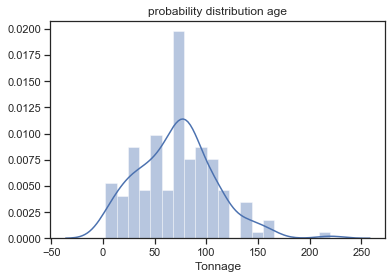

In [11]:
sns.distplot(df['Tonnage'],bins=20)
plt.title('probability distribution age')
plt.show()

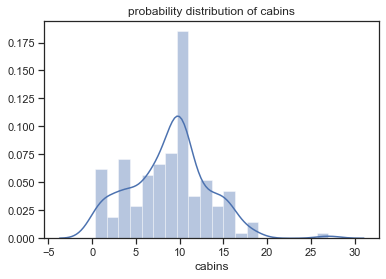

In [12]:
sns.distplot(df['cabins'],bins=20)
plt.title('probability distribution of cabins')
plt.show()

From the distribution we can say that the Tonnage, cabins is normally distributed given that it is neither skwed to the left nor skwed to the right.

### Standardization of dataset

In [13]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew']
normalization = StandardScaler()
normal = normalization.fit_transform(df[cols].values)

In [14]:
normal_df = pd.DataFrame(normal, columns=cols)
normal_df.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
1,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
2,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,-0.313304
3,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,3.237281
4,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,0.631610


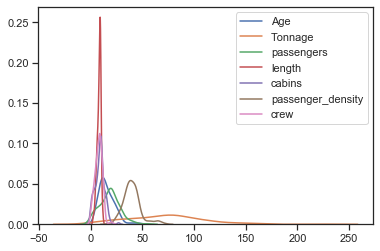

In [15]:
# Distribution before normalization

for col in cols:
    sns.kdeplot(df[col])

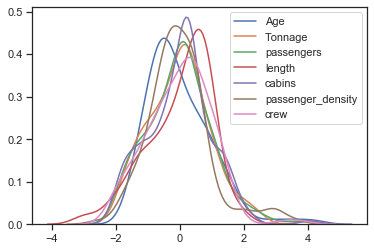

In [16]:
# Distribution after normalization

for col in cols:
    sns.kdeplot(normal_df[col])

In [17]:
# unique values in each feature/column
df.nunique()

Ship_name            138
Cruise_line           20
Age                   31
Tonnage               94
passengers           104
length                80
cabins                98
passenger_density    109
crew                  91
dtype: int64

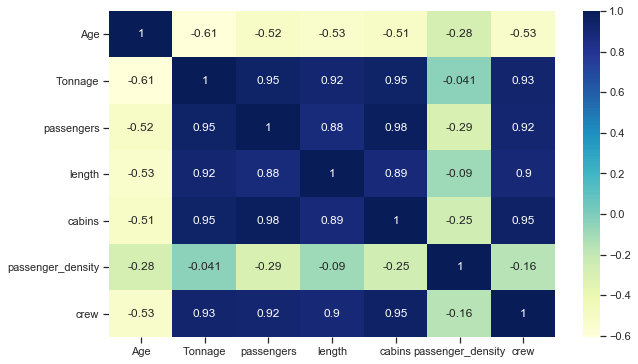

In [18]:
# Correaltion Analysis
df_corr = df.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_corr,annot=True,cmap="YlGnBu")

In [19]:
# Correlation sorted
df.corr()['crew'].sort_values()

Age                 -0.530657
passenger_density   -0.155509
length               0.895857
passengers           0.915234
Tonnage              0.927569
cabins               0.950823
crew                 1.000000
Name: crew, dtype: float64

The pairplot and pearson correlation heatmap shows the # of employees is highly correlated with Length, passengers, Tonnage and cabins.

### Important columns

In [20]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins']

In [21]:
df[cols_selected].head(5)

,Tonnage,passengers,length,cabins
0,30.277,6.94,5.94,3.55
1,30.277,6.94,5.94,3.55
2,47.262,14.86,7.22,7.43
3,110.000,29.74,9.53,14.88
4,101.353,26.42,8.92,13.21


### Performing One Hot Encoding

In [22]:
cruise2 = pd.get_dummies(df[['Ship_name', 'Cruise_line', 'Tonnage', 'passengers', 'length', 'cabins']])
cruise2.head()

,Tonnage,passengers,length,cabins,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,Ship_name_Arcadia,Ship_name_Aries,Ship_name_Armonia,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,30.277,6.94,5.94,3.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.277,6.94,5.94,3.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47.262,14.86,7.22,7.43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110.000,29.74,9.53,14.88,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101.353,26.42,8.92,13.21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In other to build a more simplified regression model, we focus on ordinal features meaning we are only using the four(4) ordinal features in our data set which are "Tonnage", "passengers", "length", "cabins"

### Assigning variables to X and Y

In [23]:
X = df[cols_selected].values

y = df['crew'].values

In [24]:
X.shape


(158, 4)

In [25]:
y.shape

(158,)

### Creating train, test, dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 1)

### Model - Random Forest Regresssion

In [27]:
rf = RandomForestRegressor(random_state = 1)

# Train the model on training data

rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [28]:
# Random Forest Predictions & Performance

prediction3 = rf.predict(X_test) # predict
mae3 = metrics.mean_absolute_error(prediction3, y_test) # Calculate MAE
mse3 = metrics.mean_squared_error(prediction3, y_test) # Calculate MSE
rmse3 = np.sqrt(mse3) # Calculate RMSE
mape3 = 100 * np.mean(mae3 / y_test) # Calculate MAPE, We drive mape from mae
accuracy3 = 100 - mape3


print('RF Model Performance')
print('--------------------', end='\n')
print("Mean Absolute Error: %.2f" % mae3)
print("Mean Square Error: %.2f" % mse3)
print("Root Mean Square Error: %.2f" % rmse3)
print("Mean absolute percentage error: %.2f" % mape3)
print('Accuracy: {:0.2f}%'.format(accuracy3))

RF Model Performance
--------------------
Mean Absolute Error: 0.46
Mean Square Error: 0.41
Root Mean Square Error: 0.64
Mean absolute percentage error: 7.73
Accuracy: 92.27%


In [29]:
rf.feature_importances_

array([0.31554453, 0.10389272, 0.08558592, 0.49497683])

### Random Forest Optimization

We will use Cross Validation and hyperparameter tuning for our model. We will use K Fold CV for Cross Validation. In KFold cv we will spit the training set into K number of susbtets called folds. We will fit the model K times, each time training the data on K-1 of the folds and evaluating on the Kth fold. The best approach will be random search to narrow our search to evaluate a wide range of hyperparameter values. Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [30]:
# print the parameters for RF

print('Parameters in use:\n')
pprint(rf.get_params())

Parameters in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [31]:
# Parameters
bootstrap = [True, False] # Sampling methods
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 20)] # Number of trees
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)] # Tree Depth
max_depth.append(None)
min_samples_leaf = [1, 2, 3] # Leaf node samples
min_samples_split = [2, 3, 4] # min number of observations require to split at node

# Create a random grid
grid = {'bootstrap': bootstrap,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_leaf': min_samples_leaf,
        'min_samples_split': min_samples_split
        }

pprint(grid)

{'bootstrap': [True, False],
 'max_depth': [5, 16, 27, 38, 50, None],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [100,
                  173,
                  247,
                  321,
                  394,
                  468,
                  542,
                  615,
                  689,
                  763,
                  836,
                  910,
                  984,
                  1057,
                  1131,
                  1205,
                  1278,
                  1352,
                  1426,
                  1500]}


There are 2,160 combination parameter settings.
It would take a very long to train all combinations using grid search, therefore we will use Random Search instead whicH selectS randomly from our combinations. The number of combinations is determined by n_iter.

In [32]:
# Random search with 3 fold cross validation, and use of 200 combinations. Then will fit the model (600 fits)

rf_cv = RandomizedSearchCV(estimator = rf, param_distributions = grid, cv = 3, n_iter = 200, random_state=1, n_jobs = -1, verbose=2)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [33]:
# best PARAMS

rf_cv.best_params_

{'n_estimators': 1131,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 50,
 'bootstrap': True}

The above parameter values are the best combination for our RF optimized model. This combinatrion achieved the lowest error based on the mse criterion.

In [34]:
# Predictions & Performance

prediction4 = rf_cv.predict(X_test) # predict
mae4 = metrics.mean_absolute_error(prediction4, y_test) # Calculate MAE
mse4 = metrics.mean_squared_error(prediction4, y_test) # Calculate MSE
rmse4 = np.sqrt(mse4) # Calculate RMSE
mape4 = 100 * np.mean(mae4 / y_test) # Calculate MAPE, We drive mape from mae
accuracy4 = 100 - mape4

print('RF Model Performance')
print('--------------------', end='\n')
print("Mean Absolute Error: %.2f" % mae4)
print("Mean Square Error: %.2f" % mse4)
print("Root Mean Square Error: %.2f" % rmse4)
print("Mean absolute percentage error: %.2f" % mape4)
print('Accuracy: {:0.2f}%'.format(accuracy4))

RF Model Performance
--------------------
Mean Absolute Error: 0.46
Mean Square Error: 0.40
Root Mean Square Error: 0.63
Mean absolute percentage error: 7.72
Accuracy: 92.28%


### Random Forest optimization metric plot

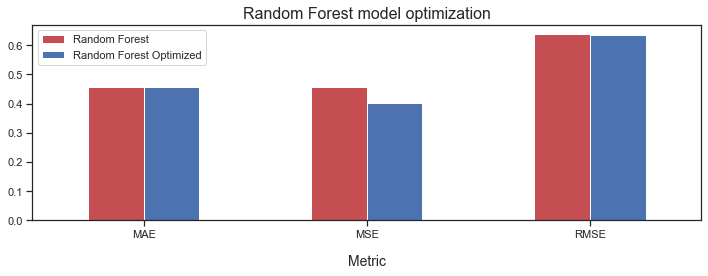

In [35]:
plotdata = pd.DataFrame({
    "Random Forest":[mae3, mae3, rmse3],
    "Random Forest Optimized":[mae4, mse4, rmse4],
    }, 
    index=["MAE", "MSE", "RMSE"]
)

plt.rcParams["figure.figsize"] = [10, 4]
plotdata.plot(kind="bar", color=['r', 'b'])
plt.title("Random Forest model optimization", fontsize="16")
plt.xticks(rotation='horizontal')
plt.xlabel("Metric", fontsize="14", labelpad=15)
plt.tight_layout()

We see an improvement on our RF model across all metrics. The bars in blue are the optimized model after hyperparamter tuning.
The goal is to decrease the metric value.

We applied EDA and built 3 models to compare. The dataset did not have any NULL or duplicated values. We did basic charts and did not include and distrubution or density plots. Generally the features were not skewed heavily and has fairly normal ditrubutions so no need for any logarithmic transformations. In addition, there wasn't heavy outliers.

We choose Random forest to optimize, we applied cross validation and random search for parameters hyper tuning.
We can also plots\ test and train error plots by collecting the scores in a loop and ploting them.

The most important feature for the random forest model was cabins followed by weight of the ship. Age, according to the model wasn't important enough for predicting number of employee for ships. This was confirmed by the model built in method and Shap.

We used only one approach which is dropping all categorical columns namely Ship name and company which most probably will not add value to the models. Another approach we can use is hot encoding to encode the categorical columns so it can be fed to the model.

In [36]:
import pickle

In [37]:
# pickle.dump(rf_cv,open('Model.pkl','wb'))

In [38]:
# rf_cv.predict(pd.DataFrame(columns=['Age','Tonnage','passengers','length','cabins','passenger_density'],data=np.array([26,47.262,14.86,7.22,7.43,31.80]).reshape(1,5))

In [39]:
"""rf_cv.predict(pd.DataFrame(columns=['Age','Tonnage','passengers','length','cabins','passenger_density'],data=np.array([26,47.262,14.86,7.22,7.43,31.80]).reshape(1,6)))"""

"rf_cv.predict(pd.DataFrame(columns=['Age','Tonnage','passengers','length','cabins','passenger_density'],data=np.array([26,47.262,14.86,7.22,7.43,31.80]).reshape(1,6)))"

In [40]:
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_cv, file)